# Practica 1
**Tecnologías de Lenguaje Natural**

*Luis Fernando Rodríguez Domínguez*

## Parte 2. Normalización de Textos

Los textos en español e inglés a analizar y procesar son los incluidos en el Anexo B y deben ser guardados en dos archivos, uno por cada documento, para ser leídos y cargados en memoria desde el programa a desarrollar.

### 1. **Investigación**:

En este estudio se realiza una comparación exhaustiva de tres módulos de procesamiento de lenguaje natural en Python – NLTK, spaCy y Stanza – orientados a la tokenización de textos en inglés y español. Se evalúan las capacidades de cada herramienta en términos de resultados de tokenización (número total de tokens, tokens únicos y frecuencia de tokens) y rendimiento temporal. La investigación busca identificar las diferencias funcionales y de performance entre los módulos, justificando su elección para el análisis de corpus en distintos idiomas. Los resultados obtenidos se analizan mediante histogramas y gráficos comparativos, proporcionando una visión integral de las ventajas y limitaciones de cada enfoque para tareas de análisis exploratorio en textos.

### 2. Análisis exploratorio de texto

In [ ]:
#!pip install spacy stanza
#!spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.4 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/pillofon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /home/pillofon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pillofon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/pillofon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NLTK:
  Tiempo de tokenización: 0.0232 s
  Total de tokens: 374
  Tokens únicos: 212

spaCy:
  Tiempo de tokenización: 0.0760 s
  Total de tokens: 381
  Tokens únicos: 216

Stanza:
  Tiempo de tokenización: 0.2758 s
  Total de tokens: 374
  Tokens únicos: 215



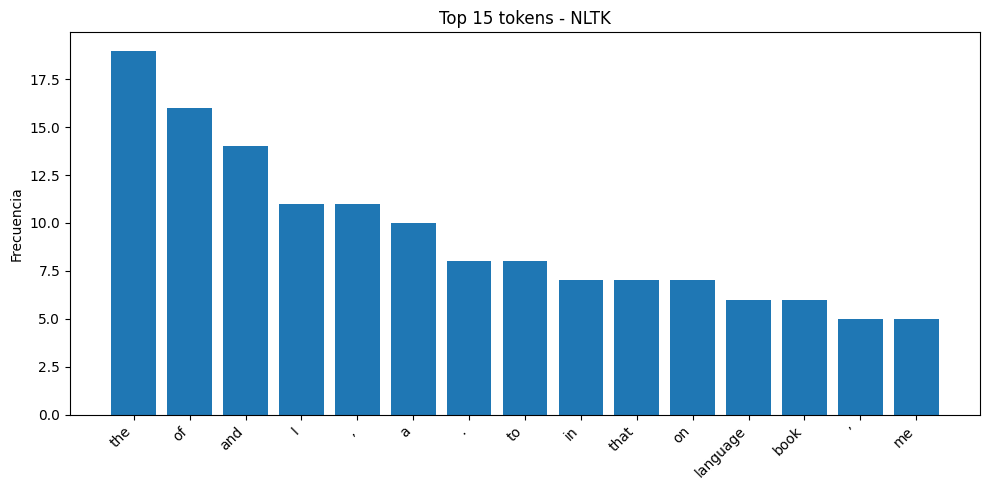

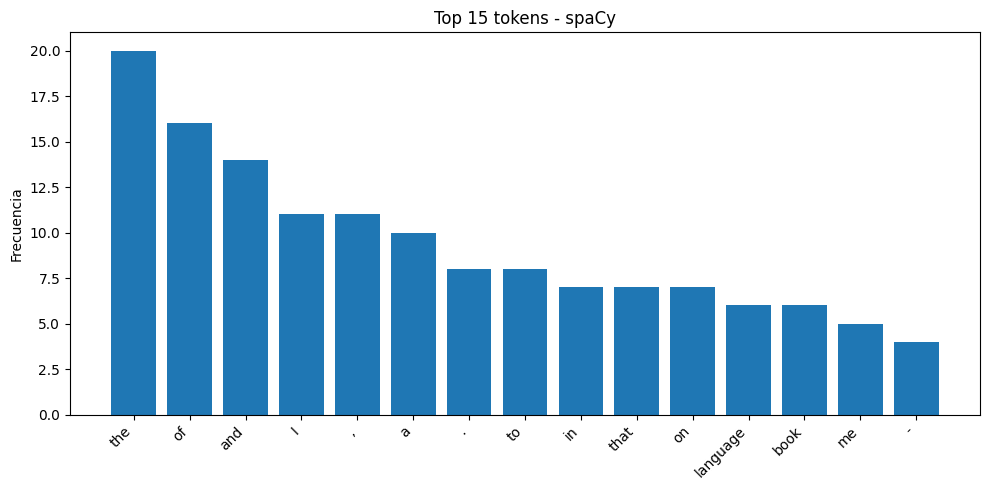

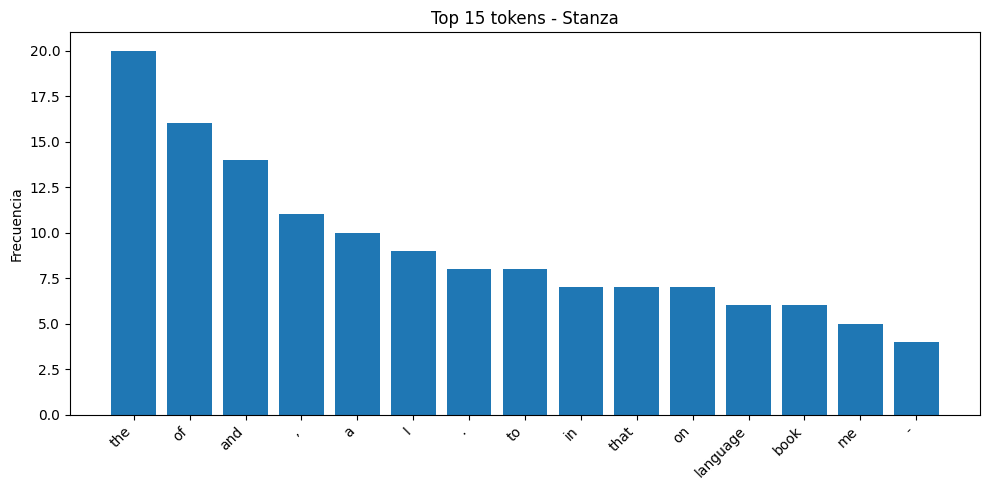

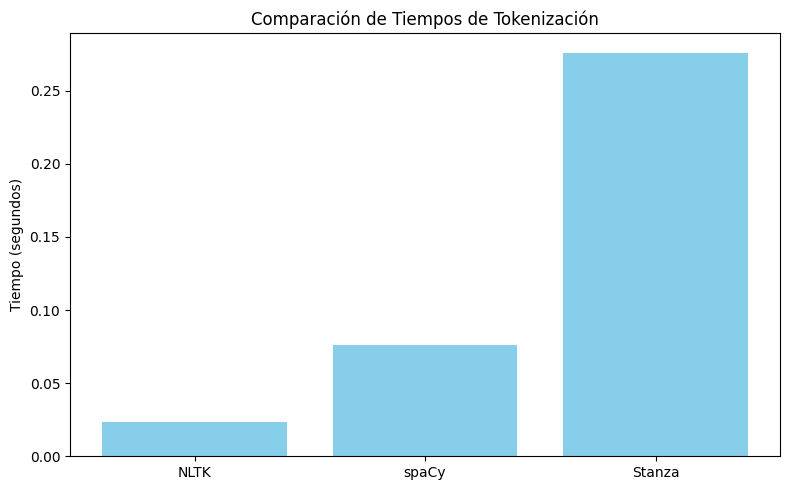

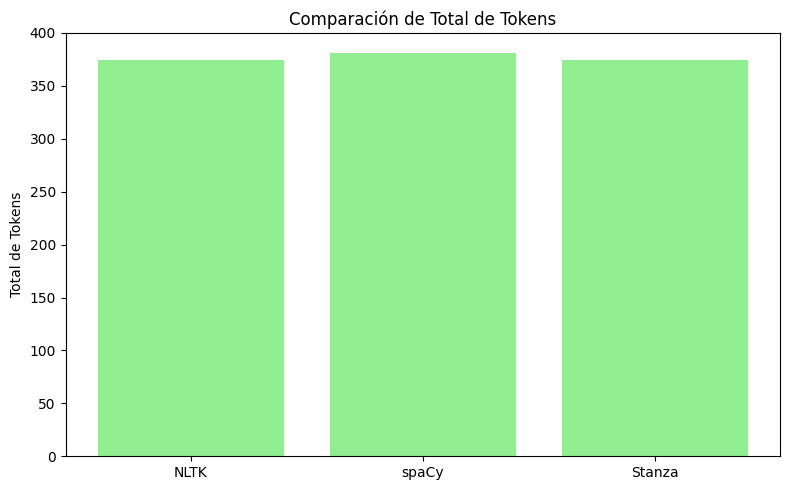

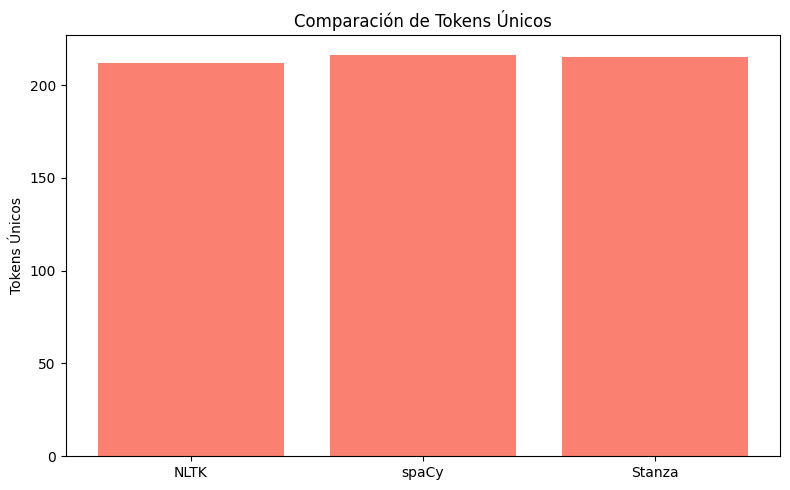

In [7]:
# %% [code]
import time
import re
import matplotlib.pyplot as plt
from collections import Counter

# --- Preparación de los módulos ---
# NLTK
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize

# spaCy
import spacy
nlp_en = spacy.load("en_core_web_sm")

# Stanza
import stanza
# Descargar el modelo para inglés (solo la primera vez)
stanza.download('en', verbose=False)
nlp_stanza = stanza.Pipeline('en', processors='tokenize', verbose=False)

# --- Cargar el texto de ejemplo ---
ruta_texto = 'AnexoBEnglish.txt'
with open(ruta_texto, 'r', encoding='utf-8') as file:
    texto = file.read()

# --- Función para análisis de tokenización ---
def analizar_tokenizacion(tokenizer_func, texto):
    """
    Aplica una función de tokenización sobre el texto, midiendo el tiempo de procesamiento.
    Retorna el tiempo transcurrido, la lista de tokens, el total de tokens y el diccionario de frecuencias.
    """
    inicio = time.time()
    tokens = tokenizer_func(texto)
    fin = time.time()
    total_tokens = len(tokens)
    tokens_unicos = len(set(tokens))
    frec = Counter(tokens)
    return fin - inicio, tokens, total_tokens, tokens_unicos, frec

# --- Definir funciones de tokenización para cada módulo ---
def nltk_tokenizer(texto):
    return word_tokenize(texto)

def spacy_tokenizer(texto):
    doc = nlp_en(texto)
    return [token.text for token in doc]

def stanza_tokenizer(texto):
    doc = nlp_stanza(texto)
    # Stanza organiza los tokens en oraciones
    tokens = []
    for oracion in doc.sentences:
        tokens.extend([token.text for token in oracion.tokens])
    return tokens

# --- Ejecutar el análisis para cada módulo ---
resultados = {}

# NLTK
tiempo_nltk, tokens_nltk, total_nltk, unicos_nltk, frec_nltk = analizar_tokenizacion(nltk_tokenizer, texto)
resultados['NLTK'] = {'tiempo': tiempo_nltk, 'total': total_nltk, 'unicos': unicos_nltk, 'frec': frec_nltk}

# spaCy
tiempo_spacy, tokens_spacy, total_spacy, unicos_spacy, frec_spacy = analizar_tokenizacion(spacy_tokenizer, texto)
resultados['spaCy'] = {'tiempo': tiempo_spacy, 'total': total_spacy, 'unicos': unicos_spacy, 'frec': frec_spacy}

# Stanza
tiempo_stanza, tokens_stanza, total_stanza, unicos_stanza, frec_stanza = analizar_tokenizacion(stanza_tokenizer, texto)
resultados['Stanza'] = {'tiempo': tiempo_stanza, 'total': total_stanza, 'unicos': unicos_stanza, 'frec': frec_stanza}

# Mostrar resultados básicos
for modulo, datos in resultados.items():
    print(f"{modulo}:")
    print(f"  Tiempo de tokenización: {datos['tiempo']:.4f} s")
    print(f"  Total de tokens: {datos['total']}")
    print(f"  Tokens únicos: {datos['unicos']}")
    print("")

# --- Generar histogramas de los 15 tokens más comunes para cada módulo ---
def plot_top_tokens(frecuencia, modulo):
    top15 = frecuencia.most_common(15)
    tokens, counts = zip(*top15)
    plt.figure(figsize=(10, 5))
    plt.bar(tokens, counts)
    plt.title(f"Top 15 tokens - {modulo}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

for modulo, datos in resultados.items():
    plot_top_tokens(datos['frec'], modulo)

# --- Gráficos comparativos de tiempos, total de tokens y tokens únicos ---
modulos = list(resultados.keys())
tiempos = [resultados[m]['tiempo'] for m in modulos]
totales = [resultados[m]['total'] for m in modulos]
unicos = [resultados[m]['unicos'] for m in modulos]

# Gráfico comparativo de tiempos de tokenización
plt.figure(figsize=(8, 5))
plt.bar(modulos, tiempos, color='skyblue')
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de Tiempos de Tokenización")
plt.tight_layout()
plt.show()

# Gráfico comparativo de total de tokens
plt.figure(figsize=(8, 5))
plt.bar(modulos, totales, color='lightgreen')
plt.ylabel("Total de Tokens")
plt.title("Comparación de Total de Tokens")
plt.tight_layout()
plt.show()

# Gráfico comparativo de tokens únicos
plt.figure(figsize=(8, 5))
plt.bar(modulos, unicos, color='salmon')
plt.ylabel("Tokens Únicos")
plt.title("Comparación de Tokens Únicos")
plt.tight_layout()
plt.show()
